<a href="https://colab.research.google.com/github/VictorAugustoCorrea/Monte-Carlo-Simulation/blob/main/Monte_Carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf

/tmp/ipython-input-1893400826.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stocks, start=start, end=end)
[*********************100%***********************]  2 of 2 completed


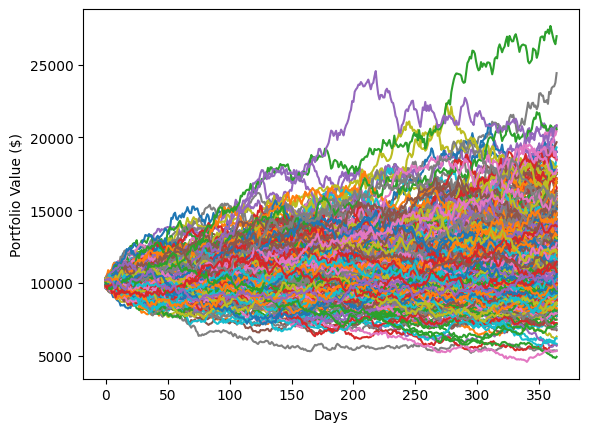

In [ ]:
#import data function
def get_data(stocks, start, end):
  stock_data = yf.download(stocks, start=start, end=end)
  stock_data = stock_data['Close']
  returns    = stock_data.pct_change()

  mean_returns = returns.mean() #Compute the mean daily returns for each stock
  covMatrix    = returns.cov() #Compute the covariance matrix of daily returns

  return mean_returns, covMatrix

#-----------------------------------------------------------------------------------------------------------------------------------
#List of stocks e time frame definition (Used one yaer)
stock_list = ['VALE3','BBAS3'] #List os stocks that we are using to simulate
stocks     = [stock + '.SA' for stock in stock_list]                          #If use us data change .SA for .AX to work
end_date   = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*5)

#-----------------------------------------------------------------------------------------------------------------------------------
#Load the data
mean_returns, covMatrix = get_data(stocks, start_date, end_date)

#-----------------------------------------------------------------------------------------------------------------------------------
#Generate random portfolio weights
# weights = np.random.random(len(mean_returns)) #Click in ctrl + / to comment the line
# weights /= np.sum(weights)

#Generate a similar distribution of amount on the portfolio
weights = np.full(len(mean_returns), 1.0 / len(mean_returns))

#Generate a manual distribution of amount in the portfolio (%)
#weights = np.array([0.15, 0.05, 0.25, 0.15, 0.25, 0.10, 0.10])

#-----------------------------------------------------------------------------------------------------------------------------------

#Time frame simalution in days
mc_sims = 365       #Number of Monte Carlo simulations
T = 365             #Number of days for simulation

#-----------------------------------------------------------------------------------------------------------------------------------
mean_metrics = np.full(shape=(T, len(weights)), fill_value=mean_returns.values)
mean_metrics = mean_metrics.T

#-----------------------------------------------------------------------------------------------------------------------------------
#Portfolio sumylation
ptfl_sims = np.full(shape=(T, mc_sims), fill_value= 0.0)

#-----------------------------------------------------------------------------------------------------------------------------------
#Amount of portfolio
initial_amount_ptfl = 10000

#-----------------------------------------------------------------------------------------------------------------------------------
#Loop                                                                                                            Notes:
for m in range(0, mc_sims):                                                                              #Run Monte Carlo simulations
  Z = np.random.normal(size=(T,len(weights)))                                                            #Generate random normal variables for simulation
  L = np.linalg.cholesky(covMatrix)                                                                      #Perform Cholesky decomposition on covariance matrix
  daily_returns = mean_metrics + np.inner(L, Z)                                                          #Calculate daily returns with correlated random shocks
  ptfl_sims[:,m] = np.cumprod(np.inner(weights, daily_returns.T) + 1) * initial_amount_ptfl              #Compute cumulative portfolio value for simulation m

plt.plot(ptfl_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.show()